#### Loan Predicter

Data Cleaning

In [513]:
# Imports
%matplotlib inline
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg'

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")
rawdata = pd.read_csv('C:/Users/annie/Documents/Summer19/Data Mining/Session 5/Assignment_3_S19 2/Assignment_3_S19/Loan_Prediction/Data for Cleaning & Modeling.csv')
holdout = pd.read_csv('C:/Users/annie/Documents/Summer19/Data Mining/Session 5/Assignment_3_S19 2/Assignment_3_S19/Loan_Prediction/holdout.csv')
rawdata.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,7.88%,61390.0,182594.0,"$4,000","$4,000","$3,900",36 months,A,A5,NaN,...,May-93,0.0,NaN,NaN,11.0,0.0,50807.0,51%,19.0,f
1,8.59%,67503.0,252415.0,"$10,000","$10,000","$10,000",36 months,A,A4,Genesys PHO,...,Dec-91,0.0,NaN,NaN,7.0,0.0,6068.0,16.70%,49.0,f
2,7.14%,68163.0,258249.0,"$3,000","$3,000","$3,000",36 months,A,A3,Matrix Resources,...,Feb-98,0.0,16.0,NaN,14.0,0.0,3021.0,4.80%,25.0,f
3,8.63%,68381.0,260179.0,"$6,625","$6,625","$6,475",36 months,A,A5,Albertsons,...,3-Dec,0.0,NaN,NaN,3.0,0.0,6282.0,44.60%,9.0,f
4,8.94%,69001.0,265533.0,"$15,000","$15,000","$14,875",36 months,A,A5,NaN,...,Nov-91,1.0,0.0,0.0,6.0,0.0,7586.0,52.70%,19.0,f


In [514]:
rawdata.shape #338989  records, 32 columns
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
X1     338990 non-null object
X2     399999 non-null float64
X3     399999 non-null float64
X4     399999 non-null object
X5     399999 non-null object
X6     399999 non-null object
X7     399999 non-null object
X8     338730 non-null object
X9     338730 non-null object
X10    376014 non-null object
X11    382462 non-null object
X12    338639 non-null object
X13    338972 non-null float64
X14    399999 non-null object
X15    399999 non-null object
X16    123560 non-null object
X17    399999 non-null object
X18    399981 non-null object
X19    399999 non-null object
X20    399999 non-null object
X21    399999 non-null float64
X22    399999 non-null float64
X23    399999 non-null object
X24    399999 non-null float64
X25    181198 non-null float64
X26    51155 non-null float64
X27    399999 non-null float64
X28    399999 non-null float64
X29    399999 non-null float64
X30    39

Data Cleaning

In [515]:
# checking for null values
holdout.isnull().sum()
rawdata.isnull().sum()

X1      61010
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X10     23986
X11     17538
X12     61361
X13     61028
X14         1
X15         1
X16    276440
X17         1
X18        19
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         1
dtype: int64

In [516]:
# Unique values in columns
for col in rawdata.columns:
    a = col,len(rawdata[col].unique()),len(rawdata[col])
    b=rawdata[col].dtypes
    print(a,b)

('X1', 483, 400000) object
('X2', 400000, 400000) float64
('X3', 400000, 400000) float64
('X4', 1340, 400000) object
('X5', 1343, 400000) object
('X6', 7037, 400000) object
('X7', 3, 400000) object
('X8', 8, 400000) object
('X9', 36, 400000) object
('X10', 187822, 400000) object
('X11', 12, 400000) object
('X12', 7, 400000) object
('X13', 25303, 400000) float64
('X14', 4, 400000) object
('X15', 92, 400000) object
('X16', 122043, 400000) object
('X17', 15, 400000) object
('X18', 61626, 400000) object
('X19', 878, 400000) object
('X20', 51, 400000) object
('X21', 3956, 400000) float64
('X22', 25, 400000) float64
('X23', 661, 400000) object
('X24', 10, 400000) float64
('X25', 144, 400000) float64
('X26', 124, 400000) float64
('X27', 61, 400000) float64
('X28', 23, 400000) float64
('X29', 54621, 400000) float64
('X30', 1232, 400000) object
('X31', 103, 400000) float64
('X32', 3, 400000) object


### X1: Interest Rate on the loan

In [517]:
#  X1 is imported as a string. We have to change it into a number for future use.
rawdata['X1'] = rawdata['X1'].str.rstrip('%').astype('float') / 100.0
# dropping all missing values of X1 because they can't be imputed
rawdata.dropna(axis=0,subset=['X1'], inplace=True)
rawdata.isnull().sum()

X1          0
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      51867
X9      51867
X10     20257
X11     14795
X12     51960
X13     51752
X14         1
X15         1
X16    233934
X17         1
X18        17
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    185457
X26    295590
X27         1
X28         1
X29         1
X30       225
X31         1
X32         1
dtype: int64

It shows that there is one entry where all rows except X1 are null. Deleting this entry


### X2: A unique id for the loan.

In [518]:
# checking for the only row which is null in X1, X2, ...
print(rawdata[rawdata["X2"].isnull()])
# It shows that there is one entry where all rows except X1 are null. Deleting this entry
#rawdata.dropna(how='all') drops rows with all nas
rawdata.dropna(subset=["X2"],inplace=True)

            X1  X2  X3   X4   X5   X6   X7   X8   X9  X10 ...   X23 X24  X25  \
399999  0.0769 NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN NaN  NaN   

       X26 X27 X28 X29  X30 X31  X32  
399999 NaN NaN NaN NaN  NaN NaN  NaN  

[1 rows x 32 columns]


In [519]:
len(rawdata['X2'].unique())
#dropping X2, all unique values
rawdata.drop(['X2'],axis=1,inplace=True)
#keeping X2 in holdout because it will be used to identify predictions in the csv

### X3: A unique id assigned for the borrower

In [520]:
len(rawdata['X3'].unique())
#dropping X3, all unique values
rawdata.drop(['X3'],axis=1,inplace=True)
holdout.drop(['X3'],axis=1,inplace=True)

### X4: Loan amount requested

In [521]:
#removing the $ and , characters and converting into float for processing
rawdata['X4'] = rawdata['X4'].str.replace('$', '')
rawdata['X4'] = rawdata['X4'].str.replace(',', '').astype('int') 
holdout['X4'] = holdout['X4'].str.replace('$', '')
holdout['X4'] = holdout['X4'].str.replace(',', '').astype('int') 

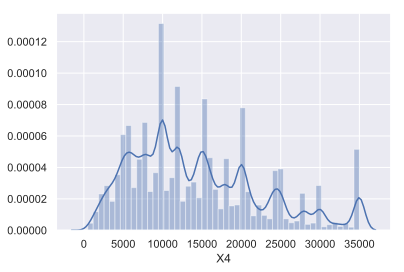

In [522]:
sns.distplot(rawdata['X4'])
plt.show()

In [523]:
# making buckets out of X4
rawdata['X4analysis'] = pd.cut(rawdata['X4'],[0,7000,10000,15000,20000])
#pd.qcut(rawdata['X4'],10)
#holdout['X4analysis'] = pd.cut(holdout['X4'],[0,7000,10000,15000,20000])
rawdata['X4analysis'].value_counts()

(10000, 15000]    75529
(0, 7000]         71279
(7000, 10000]     64505
(15000, 20000]    57343
Name: X4analysis, dtype: int64

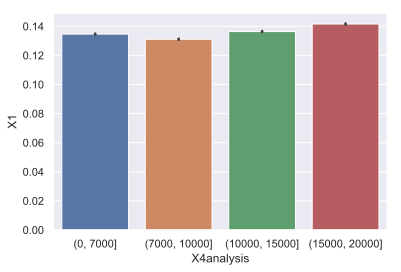

In [524]:
sns.barplot(x='X4analysis',y='X1',data=rawdata)
plt.show()
# not much distinction with 5 or 10 groups. but we shall keep this because intuitively 
# loan amount request could have an effect on the loan %

In [525]:
# amount of loan might have some effect on the percentage of interest so keeping this varaible
rawdata.drop(['X4analysis'],axis=1,inplace=True)
#holdout.drop(['X4'],axis=1,inplace=True)

### X5: Loan amount funded

In [526]:
rawdata['X5'] = rawdata['X5'].str.replace('$', '')
rawdata['X5'] = rawdata['X5'].str.replace(',', '').astype('int') 

holdout['X5'] = holdout['X5'].str.replace('$', '')
holdout['X5'] = holdout['X5'].str.replace(',', '').astype('int')

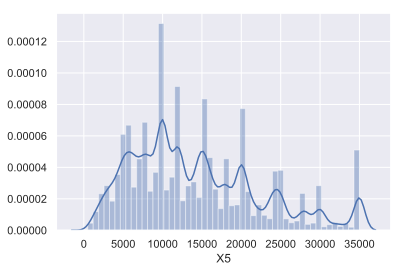

In [527]:
sns.distplot(rawdata['X5'])
plt.show()

In [528]:
# making buckets out of X5
rawdata['X5analysis'] = pd.cut(rawdata['X5'],[0,7000,10000,15000,20000,35000])
#pd.qcut(rawdata['X5'],5)
#holdout['X5analysis'] = pd.cut(holdout['X5'],[0,7000,10000,15000,20000,35000])
rawdata['X5analysis'].value_counts()

(10000, 15000]    75708
(0, 7000]         71482
(20000, 35000]    69907
(7000, 10000]     64558
(15000, 20000]    57334
Name: X5analysis, dtype: int64

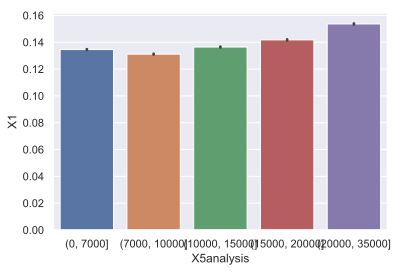

In [529]:
sns.barplot(x='X5analysis',y='X1',data=rawdata)
plt.show()
# not much distinction with 5 or 10 groups.

In [530]:
# no distinction on target variable, dropping X5
rawdata.drop(['X5'],axis=1,inplace=True)
rawdata.drop(['X5analysis'],axis=1,inplace=True)
holdout.drop(['X5'],axis=1,inplace=True)

### X6: Investor-funded portion of loan

In [531]:
rawdata['X6'] = rawdata['X6'].str.replace('$', '')
rawdata['X6'] = rawdata['X6'].str.replace(',', '').astype('int')
holdout['X6'] = holdout['X6'].str.replace('$', '')
holdout['X6'] = holdout['X6'].str.replace(',', '').astype('int') 

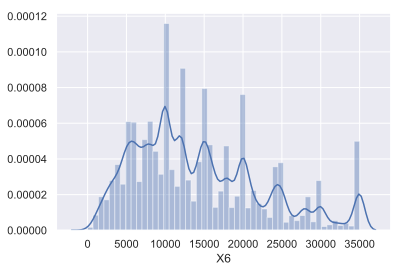

In [532]:
sns.distplot(rawdata['X6'])
plt.show()

In [533]:
# making buckets out of X6
rawdata['X6analysis'] = pd.cut(rawdata['X6'],[0,7000,10000,15000,20000,35000])
#pd.qcut(rawdata['X6'],5)
#holdout['X6analysis'] = pd.cut(holdout['X6'],[0,7000,10000,15000,20000,35000])
rawdata['X6analysis'].value_counts()


(10000, 15000]    75460
(0, 7000]         72468
(20000, 35000]    69616
(7000, 10000]     64284
(15000, 20000]    57011
Name: X6analysis, dtype: int64

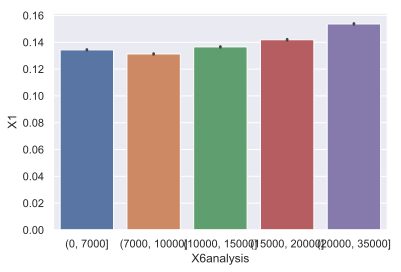

In [534]:
rawdata['X6'].value_counts()
sns.barplot(x='X6analysis',y='X1',data=rawdata)
plt.show()

In [535]:
rawdata.drop(['X6analysis'],axis=1,inplace=True)
rawdata.drop(['X6'],axis=1,inplace=True)
holdout.drop(['X6'],axis=1,inplace=True)
# not much distinction with 5 or 10 groups. 

### X7: Number of payments (36 or 60)

In [536]:
rawdata['X7'].value_counts()

 36 months    247791
 60 months     91198
Name: X7, dtype: int64

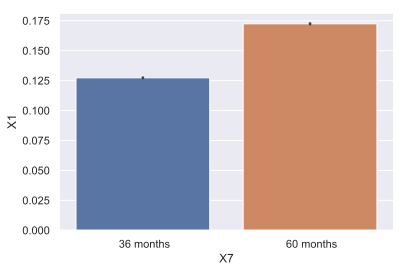

In [537]:
sns.barplot(x='X7',y='X1',data=rawdata)
plt.show()
#good distinction

### X8:Loan grade

In [538]:
rawdata['X8'].value_counts()

B    86121
C    76446
D    46984
A    45525
E    21628
F     8395
G     2024
Name: X8, dtype: int64

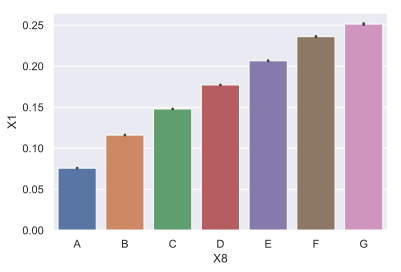

In [539]:
sns.barplot(x='X8',y='X1',data=rawdata)
plt.show()
#very good distinction

In [540]:
missingvals = rawdata['X8'].isnull().sum()/len(rawdata)
print(missingvals*100.00)
# no missing values in holdout set

15.300201481464


In [541]:
rawdata.dropna(subset=["X8"],inplace=True)

This looks like a good indicator of our target variable, X1. So instead of imputing values, we shall just remove the vlaues with NA instead of introducing noise 


### X9: Loan subgrade

In [542]:
rawdata['X9'].value_counts()

B3    20352
B4    19137
B2    16767
C1    16342
C2    16310
B5    15521
C3    15425
C4    14646
B1    14344
C5    13723
A5    13086
A4    11806
D1    11720
D2    10498
D3     9091
D4     8573
A3     7653
D5     7102
A2     6496
A1     6484
E1     5447
E2     5246
E3     4230
E4     3640
E5     3065
F1     2490
F2     1873
F3     1712
F4     1331
F5      989
G1      677
G2      511
G3      378
G4      252
G5      206
Name: X9, dtype: int64

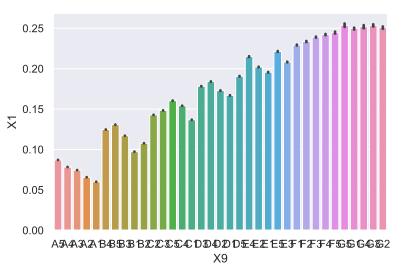

In [543]:
sns.barplot(x='X9',y='X1',data=rawdata)
plt.show()
#good distinction, and more granularity than X8. High Multicollinearity with X8,so only 1 of these should be used.

In [544]:
rawdata['X9'].isnull().sum()
# dropping X8 nulls, also dropped X9 nulls 

0

In [545]:
# F and G could be combined
rawdata['X9']=rawdata['X9'].str.replace('G1','G')
rawdata['X9']=rawdata['X9'].str.replace('G2','G')
rawdata['X9']=rawdata['X9'].str.replace('G3','G')
rawdata['X9']=rawdata['X9'].str.replace('G4','G')
rawdata['X9']=rawdata['X9'].str.replace('G5','G')
rawdata['X9']=rawdata['X9'].str.replace('F1','F1')
rawdata['X9']=rawdata['X9'].str.replace('F2','F1')
rawdata['X9']=rawdata['X9'].str.replace('F3','F2')
rawdata['X9']=rawdata['X9'].str.replace('F4','F2')
rawdata['X9']=rawdata['X9'].str.replace('F5','F2')
holdout['X9']=holdout['X9'].str.replace('G1','G')
holdout['X9']=holdout['X9'].str.replace('G2','G')
holdout['X9']=holdout['X9'].str.replace('G3','G')
holdout['X9']=holdout['X9'].str.replace('G4','G')
holdout['X9']=holdout['X9'].str.replace('G5','G')
holdout['X9']=holdout['X9'].str.replace('F1','F1')
holdout['X9']=holdout['X9'].str.replace('F2','F1')
holdout['X9']=holdout['X9'].str.replace('F3','F2')
holdout['X9']=holdout['X9'].str.replace('F4','F2')
holdout['X9']=holdout['X9'].str.replace('F5','F2')

In [546]:
#Understanding the rest of the columns with NAs
X9group=rawdata.groupby('X9')
#X8group.describe()
X9size = X9group.size()
#print(X8size)
avgloan = rawdata.groupby(by=['X9'])['X1'].mean()*100
df = pd.DataFrame({'X9': X9size, 'Loan': avgloan})
print(df)

       X9       Loan
X9                  
A1   6484   6.003031
A2   6496   6.568410
A3   7653   7.450438
A4  11806   7.830203
A5  13086   8.704106
B1  14344   9.731866
B2  16767  10.772548
B3  20352  11.698563
B4  19137  12.467970
B5  15521  13.068580
C1  16342  13.675840
C2  16310  14.279962
C3  15425  14.835252
C4  14646  15.408796
C5  13723  16.036739
D1  11720  16.694815
D2  10498  17.292438
D3   9091  17.831784
D4   8573  18.398640
D5   7102  19.065736
E1   5447  19.558087
E2   5246  20.209335
E3   4230  20.825929
E4   3640  21.496505
E5   3065  22.134551
F1   4363  23.107999
F2   4032  24.145375
G    2024  25.141532


### X10: Employer or job title (self-filled)

In [547]:
len(rawdata['X10'].unique()) # 142102
missingvals = rawdata['X10'].isnull().sum()/len(rawdata)
print(missingvals*100.00)

5.946232102618041


In [548]:
rawdata['X10'].value_counts()
rawdata['X10'].dtypes

dtype('O')

In [549]:
X10group= rawdata.groupby('X10')
X10group.size() #returns all unique values
X10group.size().sort_values(ascending=False)
#most repeated  value is 1% of the data. This variable holds almost no predictive power. 
#rawdata.drop('X10',axis=1,inplace=True)
#rawdata.shape

X10
Teacher                                 3024
Manager                                 2411
Registered Nurse                        1307
RN                                      1216
Supervisor                              1086
Sales                                    906
Project Manager                          903
Office Manager                           772
Owner                                    747
manager                                  738
Driver                                   725
General Manager                          690
Director                                 670
teacher                                  657
Engineer                                 591
Vice President                           532
driver                                   521
Attorney                                 471
President                                471
Administrative Assistant                 465
Operations Manager                       459
Accountant                               444
superv

In [550]:
#rawdata.dropna(subset=['X10'],inplace=True)
rawdata.drop(['X10'],axis=1,inplace=True)
holdout.drop(['X10'],axis=1,inplace=True)

### X11: Number of years employed (0 to 10; 10 = 10 or more)

In [551]:
rawdata['X11'].value_counts()

10+ years    91870
2 years      25550
3 years      22613
< 1 year     22029
5 years      19514
1 year       18132
4 years      17220
6 years      16576
7 years      16447
8 years      13773
9 years      10948
Name: X11, dtype: int64

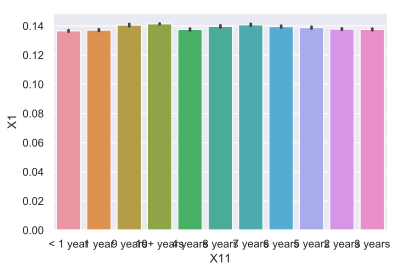

In [552]:
sns.barplot(x='X11',y='X1',data=rawdata)
plt.show()

In [553]:
# no distinction, dropping var
rawdata.drop(['X11'],axis=1,inplace=True)
holdout.drop(['X11'],axis=1,inplace=True)

### X12: Home ownership status: RENT, OWN, MORTGAGE, OTHER.

In [554]:
rawdata['X12'].value_counts()

rawdata['X12']=rawdata['X12'].str.replace('OWN','OTHER')
rawdata['X12']=rawdata['X12'].str.replace('NONE','OTHER')
rawdata['X12']=rawdata['X12'].str.replace('ANY','OTHER')
holdout['X12']=holdout['X12'].str.replace('OWN','OTHER')
holdout['X12']=holdout['X12'].str.replace('NONE','OTHER')
holdout['X12']=holdout['X12'].str.replace('ANY','OTHER')

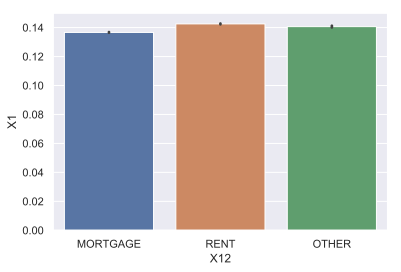

In [555]:
sns.barplot(x='X12',y='X1',data=rawdata)
plt.show()

In [556]:
# no distinction, dropping variable
rawdata.drop(['X12'],inplace=True,axis=1)
holdout.drop(['X12'],inplace=True,axis=1)

### X13: Annual income of borrower

In [557]:
print(rawdata['X13'].median(),rawdata['X13'].mode(),rawdata['X13'].mean())

62770.0 0    60000.0
dtype: float64 73132.81800537145


In [559]:
#median is a better way of prediction, mean is compromised by extremes
rawdata['X13'].fillna(rawdata['X13'].median(),inplace=True)

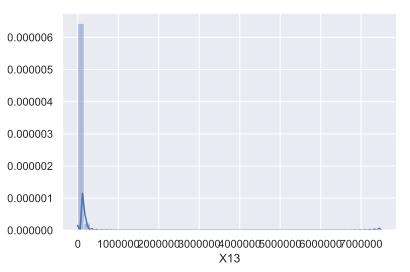

In [560]:
x13=rawdata['X13']
sns.distplot(x13)
plt.show()

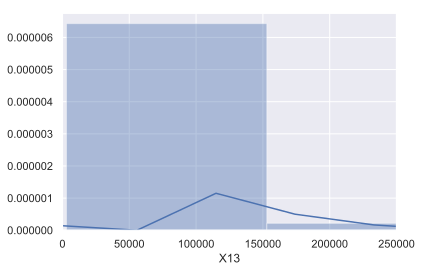

In [561]:
sns.distplot(rawdata['X13'])
plt.xlim(-10, 250000)
plt.show()

In [562]:
# making buckets out of X13
rawdata['X13'] = pd.cut(rawdata['X13'],[0,50000,75000,100000,125000,150000])
rawdata['X13'].value_counts()


(50000, 75000]      120372
(0, 50000]           82089
(75000, 100000]      44446
(100000, 125000]     20016
(125000, 150000]      9699
Name: X13, dtype: int64

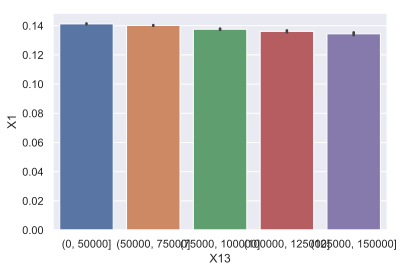

In [563]:
sns.barplot(x='X13',y='X1',data=rawdata)
plt.show()

In [564]:
# no distinction, dropping variable
rawdata.drop(['X13'],axis=1,inplace=True)
holdout.drop(['X13'],axis=1,inplace=True)

### X14: Income verified, not verified, or income source was verified

In [565]:
rawdata['X14'].value_counts()

VERIFIED - income           107493
not verified                 91543
VERIFIED - income source     88087
Name: X14, dtype: int64

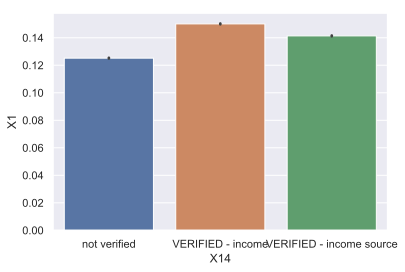

In [566]:
sns.barplot(x='X14',y='X1',data=rawdata)
plt.show()

### X15: Date loan was issued

In [567]:
date = rawdata["X15"].str.split("-", n = 1, expand = True)
date.head()

,0,1
0,10,Feb
1,9,Oct
2,10,Feb
3,8,Mar
4,9,Sep


In [568]:
rawdata["X15"]= date[1]
rawdata["X15"].value_counts()

Jul    35465
Aug    28927
May    25771
Jun    25204
Oct    24836
Apr    24697
Sep    23930
Mar    21876
Feb    19853
Jan    19792
Dec    18416
Nov    18356
Name: X15, dtype: int64

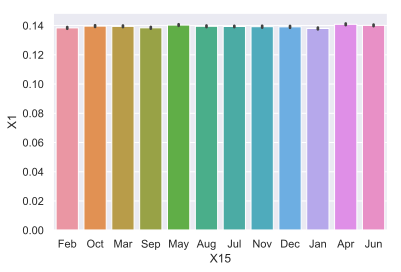

In [569]:
sns.barplot(x='X15',y='X1',data=rawdata)
plt.show()

In [570]:
# no distinction, dropping variable
rawdata.drop(['X15'],axis=1,inplace=True)
holdout.drop(['X15'],axis=1,inplace=True)

### X16: Reason for loan provided by borrower

In [571]:
len(rawdata["X16"].unique()) #82453
# too many unique values

88194

In [572]:
len(rawdata['X16'].unique()) # 142102
missingvals = rawdata['X16'].isnull().sum()/len(rawdata)
print(missingvals*100.00)

68.95999275571793


In [573]:
# too many missing values, dropping var
rawdata.drop(['X16'],axis=1,inplace=True)
holdout.drop(['X16'],axis=1,inplace=True)

### X17: Loan category, as provided by borrower

In [574]:
len(rawdata["X17"].unique())
rawdata["X17"].value_counts()

debt_consolidation    167815
credit_card            64107
home_improvement       16636
other                  14564
major_purchase          6191
small_business          4560
car                     3510
medical                 2807
moving                  1806
wedding                 1634
vacation                1557
house                   1452
educational              244
renewable_energy         240
Name: X17, dtype: int64

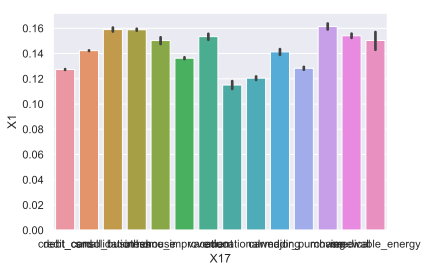

In [575]:
sns.barplot(x='X17',y='X1',data=rawdata)
plt.show()

In [576]:
# not the best variation, hesitantly dropping var
rawdata.drop(['X17'],axis=1,inplace=True)
holdout.drop(['X17'],axis=1,inplace=True)

### X18: Loan title, as provided by borrower

In [577]:
# filling 16 NA records with most frequent value
rawdata['X18'].fillna(rawdata['X18'].value_counts().index[0],inplace=True)

In [578]:
len(rawdata["X18"].unique()) #53614
rawdata["X18"].value_counts()

Debt consolidation                          89441
Credit card refinancing                     34386
Debt Consolidation                          11199
Home improvement                             8412
Other                                        6886
Consolidation                                3856
debt consolidation                           3463
Debt Consolidation Loan                      2727
Major purchase                               2520
Business                                     2067
Credit Card Consolidation                    1695
consolidation                                1568
Personal Loan                                1528
Medical expenses                             1511
Consolidation Loan                           1269
Home Improvement                             1252
Car financing                                1165
Credit Card Refinance                        1045
Credit Card Payoff                            990
Vacation                                      901


In [579]:
# too many unique values, dropping var
rawdata.drop(['X18'],axis=1,inplace=True)
holdout.drop(['X18'],axis=1,inplace=True)

### X19: First 3 numbers of zip code

In [580]:
len(rawdata["X19"].unique()) #870
rawdata['X19'].value_counts()

945xx    3336
750xx    3161
112xx    3130
606xx    2908
100xx    2725
900xx    2580
300xx    2537
070xx    2512
331xx    2392
770xx    2231
917xx    2183
891xx    2045
117xx    1974
104xx    1969
921xx    1953
330xx    1924
926xx    1897
913xx    1811
852xx    1727
113xx    1700
925xx    1668
021xx    1576
334xx    1535
080xx    1525
941xx    1525
980xx    1489
928xx    1476
600xx    1450
601xx    1448
481xx    1433
         ... 
681xx       2
685xx       2
942xx       2
040xx       2
044xx       2
838xx       2
049xx       1
528xx       1
861xx       1
510xx       1
689xx       1
511xx       1
203xx       1
502xx       1
375xx       1
832xx       1
643xx       1
621xx       1
093xx       1
888xx       1
008xx       1
522xx       1
965xx       1
889xx       1
092xx       1
663xx       1
516xx       1
524xx       1
901xx       1
833xx       1
Name: X19, Length: 870, dtype: int64

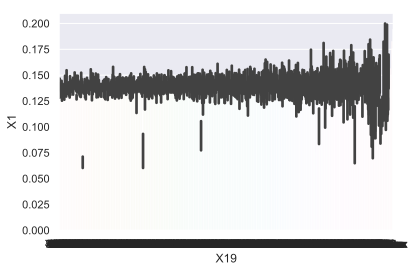

In [581]:
sns.barplot(x='X19',y='X1',data=rawdata)
plt.show()
# drop because of multicollinearity with X20, the state of borrower

In [582]:
# too many unique values, dropping var
rawdata.drop(['X19'],axis=1,inplace=True)
holdout.drop(['X19'],axis=1,inplace=True)

### X20: State of borrower

In [583]:
df1=pd.DataFrame(rawdata['X20'].value_counts())
df1

,X20
CA,44622
NY,24749
TX,22499
FL,19248
IL,11434
NJ,11111
PA,10054
OH,9374
GA,9191
VA,8816


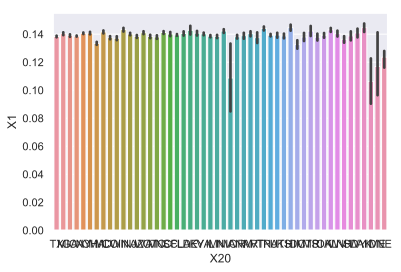

In [584]:
sns.barplot(x='X20',y='X1',data=rawdata)
plt.show()

### X21: A ratio

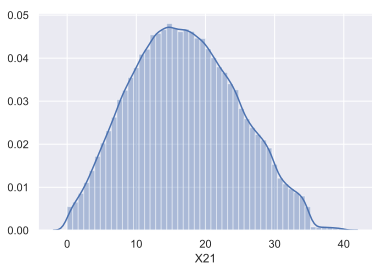

In [585]:
sns.distplot(rawdata['X21'])
plt.show()

In [586]:
for data in [rawdata, holdout]:
    data.loc[(data['X21'] <= 7) , 'X21group'] = 0
    data.loc[(data['X21'] > 7) & (data['X21'] <= 10), 'X21group'] = 1
    data.loc[(data['X21'] > 10) & (data['X21'] <= 12), 'X21group'] = 2
    data.loc[(data['X21'] > 12) & (data['X21'] <= 15), 'X21group'] = 3
    data.loc[(data['X21'] > 15) & (data['X21'] <= 17), 'X21group'] = 4
    data.loc[(data['X21'] > 17) & (data['X21'] <= 19), 'X21group'] = 5
    data.loc[(data['X21'] > 19) & (data['X21'] <= 21), 'X21group'] = 6
    data.loc[(data['X21'] > 21) & (data['X21'] <= 24), 'X21group'] = 7
    data.loc[(data['X21'] > 24) & (data['X21'] <= 27), 'X21group'] = 7
    data.loc[ data['X21'] > 27, 'X21group'] = 8

In [587]:
'''rawdata['X21'] =pd.cut(rawdata['X21'],[0,7,10,12,15,17,19,21,24,27,50])
                        # pd.qcut(rawdata['X21'],10)
holdout['X21'] =pd.cut(holdout['X21'],[0,7,10,12,15,17,19,21,24,27,50])
'''
rawdata['X21group'].value_counts()

7.0    55785
3.0    39859
8.0    32528
0.0    28903
1.0    28475
4.0    26834
5.0    26330
6.0    24844
2.0    23565
Name: X21group, dtype: int64

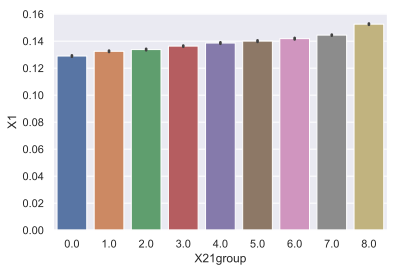

In [588]:
sns.barplot(x='X21group',y='X1',data=rawdata)
plt.show()

In [589]:
rawdata.drop(['X21'],inplace=True,axis=1)
holdout.drop(['X21'],inplace=True,axis=1)

### X22: The number of 30+ days past

In [590]:
rawdata['X22'].value_counts()

0.0     237355
1.0      33628
2.0       9788
3.0       3380
4.0       1414
5.0        708
6.0        377
7.0        191
8.0         97
9.0         58
10.0        43
11.0        24
12.0        22
13.0        13
18.0         6
14.0         5
17.0         3
16.0         3
19.0         2
15.0         2
21.0         1
22.0         1
29.0         1
24.0         1
Name: X22, dtype: int64

In [591]:
rawdata['X22'] =rawdata['X22'].clip_upper(3)

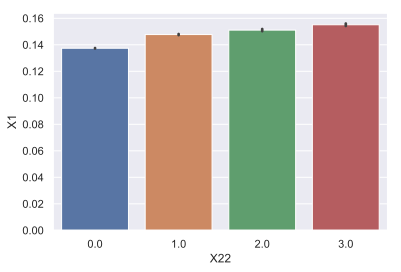

In [592]:
sns.barplot(x='X22',y='X1',data=rawdata)
plt.show()

In [593]:
# no distinction on target variable. 
rawdata.drop(['X22'],axis=1, inplace=True)
holdout.drop(['X22'],inplace=True,axis=1)

### X23:Date the borrower's earliest reported credit line was opened

In [594]:
def getmonth(x):
    annies_list = x.split('-')
    try:
        int(annies_list[0])
        return annies_list[1]
    except:
        return annies_list[0]
    
rawdata['X23']=rawdata.X23.apply(lambda x: getmonth(x))

In [595]:
rawdata['X23'].value_counts()

Oct    28079
Sep    26924
Aug    26453
Nov    26031
Dec    25080
Jan    23036
Jul    22975
Mar    22650
May    22077
Jun    21808
Feb    21033
Apr    20977
Name: X23, dtype: int64

In [596]:
avg = rawdata.groupby(rawdata['X23'])['X1'].mean()*100
value = rawdata['X23'].value_counts()
df = pd.DataFrame({'Value': value, 'Avg':avg})
print(df)

     Value        Avg
Apr  20977  14.011159
Aug  26453  13.814710
Dec  25080  13.974075
Feb  21033  13.952787
Jan  23036  13.968089
Jul  22975  13.969301
Jun  21808  13.988279
Mar  22650  13.961733
May  22077  14.015325
Nov  26031  13.997195
Oct  28079  13.899242
Sep  26924  13.837827


In [597]:
rawdata.drop(['X23'],inplace=True,axis=1)
holdout.drop(['X23'],inplace=True,axis=1)

### X24: Number of inquiries by creditors during the past 6 months.

In [598]:
rawdata['X24'].value_counts()

0.0    145807
1.0     80794
2.0     37167
3.0     16779
4.0      4341
5.0      1546
6.0       636
7.0        37
8.0        16
Name: X24, dtype: int64

In [599]:
rawdata['X24'] =rawdata['X24'].clip_upper(4)

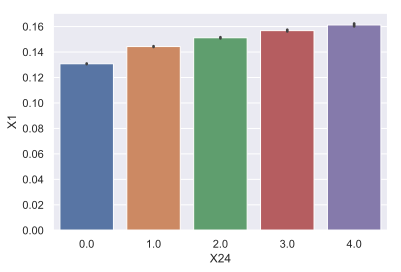

In [600]:
sns.barplot(x='X24',y='X1',data=rawdata)
plt.show()

### X25: Number of months since the borrower's last delinquency.

In [601]:
# dropping X25 because more than half the values are missing.  Any approximated replacement would be misleading
rawdata['X25'].isnull().sum()
rawdata.drop(['X25'],axis=1, inplace=True)
holdout.drop(['X25'],inplace=True,axis=1)

### X26: Number of months since the last public record.

In [602]:
# dropping X26 because 87% of the values are missing. Any approximated replacement would be misleading
rawdata['X26'].isnull().sum()
rawdata.drop(['X26'],axis=1, inplace=True)
holdout.drop(['X26'],inplace=True,axis=1)

### X27: Number of open credit lines in the borrower's credit file.

In [603]:
rawdata['X27'].value_counts()

9.0     27511
10.0    26445
8.0     26009
11.0    24297
7.0     23483
12.0    21476
6.0     19193
13.0    18438
14.0    15097
5.0     13166
15.0    12460
16.0    10208
17.0     8227
4.0      7600
18.0     6633
19.0     5142
20.0     3961
3.0      3361
21.0     3143
22.0     2408
23.0     1834
24.0     1495
2.0      1125
25.0     1071
26.0      750
27.0      584
28.0      431
29.0      323
30.0      258
31.0      166
32.0      145
33.0      119
35.0       91
34.0       88
36.0       74
1.0        62
37.0       56
38.0       39
39.0       39
40.0       20
42.0       19
41.0       19
43.0       13
45.0       10
44.0        7
49.0        6
50.0        3
48.0        3
46.0        2
58.0        2
47.0        2
51.0        2
0.0         2
53.0        1
61.0        1
62.0        1
76.0        1
55.0        1
Name: X27, dtype: int64

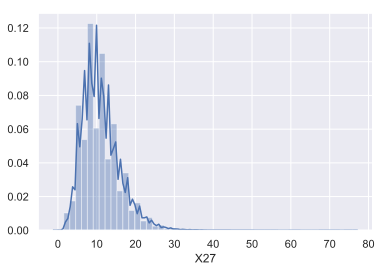

In [604]:
sns.distplot(rawdata['X27'])
plt.show()

In [605]:
rawdata['X27'] = pd.cut(rawdata['X27'],[0,5,10,15,20,25])

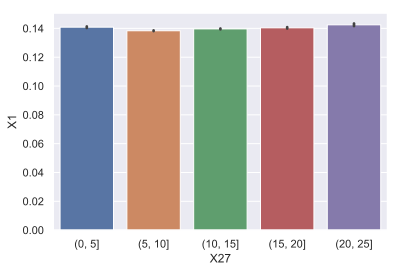

In [606]:
sns.barplot(x='X27',y='X1',data=rawdata)
plt.show()

In [607]:
rawdata.drop(['X27'],axis=1, inplace=True)
holdout.drop(['X27'],inplace=True,axis=1)

### X28: Number of derogatory public records

In [608]:
rawdata['X28'].value_counts()

0.0     250932
1.0      31541
2.0       3116
3.0        910
4.0        302
5.0        155
6.0         80
7.0         38
8.0         17
9.0         10
10.0         8
11.0         3
13.0         2
21.0         1
18.0         1
49.0         1
54.0         1
14.0         1
34.0         1
17.0         1
40.0         1
63.0         1
Name: X28, dtype: int64

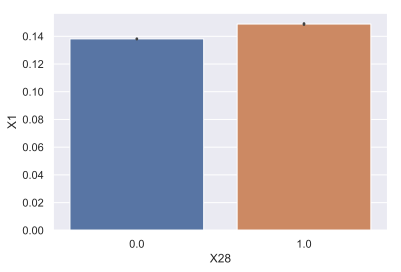

In [609]:
rawdata['X28'] = rawdata['X28'] .clip_upper(1)
sns.barplot(x='X28',y='X1',data=rawdata)
plt.show()

In [610]:
rawdata.drop(['X28'],axis=1, inplace=True)
holdout.drop(['X28'],inplace=True,axis=1)

### X29: Total credit revolving balance

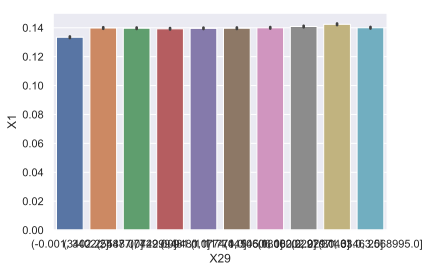

In [611]:
rawdata['X29']=pd.qcut(rawdata['X29'],10)
sns.barplot(x='X29',y='X1',data=rawdata)
plt.show()

In [612]:
rawdata.drop(['X29'],axis=1, inplace=True)
holdout.drop(['X29'],inplace=True,axis=1)

### X30: Revolving line utilization rate

In [613]:
rawdata['X30']=rawdata['X30'].str.replace('%','').astype('float')
holdout['X30']=holdout['X30'].str.replace('%','').astype('float')
#filling missing values with the most common value
rawdata['X30'].fillna(rawdata['X30'].value_counts().index[0],inplace=True)
rawdata['X30'].value_counts()

0.00      1641
60.00      522
58.00      521
53.00      517
57.00      514
62.00      508
59.00      504
63.00      504
67.00      500
65.00      500
61.00      497
49.00      497
48.00      496
71.00      491
54.00      485
64.60      485
52.00      484
72.00      484
56.00      479
70.00      476
55.00      474
47.00      473
50.00      470
69.00      465
61.60      463
67.10      463
64.30      460
66.70      460
51.00      459
59.60      458
          ... 
34.89        1
49.69        1
57.56        1
58.19        1
177.70       1
892.30       1
123.00       1
107.70       1
0.83         1
110.10       1
29.53        1
109.10       1
26.32        1
153.00       1
113.90       1
122.40       1
77.63        1
117.50       1
107.20       1
119.10       1
112.00       1
69.98        1
116.10       1
23.11        1
104.30       1
117.70       1
5.33         1
24.89        1
10.17        1
127.00       1
Name: X30, Length: 1181, dtype: int64

In [614]:
rawdata['X30'].value_counts()

0.00      1641
60.00      522
58.00      521
53.00      517
57.00      514
62.00      508
59.00      504
63.00      504
67.00      500
65.00      500
61.00      497
49.00      497
48.00      496
71.00      491
54.00      485
64.60      485
52.00      484
72.00      484
56.00      479
70.00      476
55.00      474
47.00      473
50.00      470
69.00      465
61.60      463
67.10      463
64.30      460
66.70      460
51.00      459
59.60      458
          ... 
34.89        1
49.69        1
57.56        1
58.19        1
177.70       1
892.30       1
123.00       1
107.70       1
0.83         1
110.10       1
29.53        1
109.10       1
26.32        1
153.00       1
113.90       1
122.40       1
77.63        1
117.50       1
107.20       1
119.10       1
112.00       1
69.98        1
116.10       1
23.11        1
104.30       1
117.70       1
5.33         1
24.89        1
10.17        1
127.00       1
Name: X30, Length: 1181, dtype: int64

In [615]:
for data in [rawdata, holdout]:
    data.loc[(data['X30'] <= 23.0) , 'X30group'] = 0
    data.loc[(data['X30'] > 23.0) & (data['X30'] <= 35.0), 'X30group'] = 1
    data.loc[(data['X30'] > 35.0) & (data['X30'] <= 43.0), 'X30group'] = 2
    data.loc[(data['X30'] > 43.0) & (data['X30'] <= 51.0), 'X30group'] = 3
    data.loc[(data['X30'] > 51.0) & (data['X30'] <= 57.0), 'X30group'] = 4
    data.loc[(data['X30'] > 57.0) & (data['X30'] <= 64.0), 'X30group'] = 5
    data.loc[(data['X30'] > 64.0) & (data['X30'] <= 71.0), 'X30group'] = 6
    data.loc[(data['X30'] > 71.0) & (data['X30'] <= 78.0), 'X30group'] = 7
    data.loc[ data['X30'] > 78.0, 'X30group'] = 8


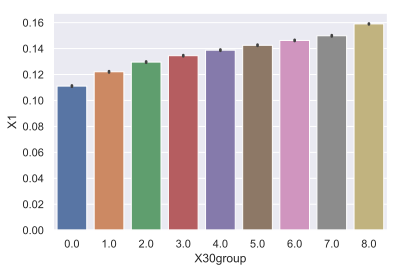

In [616]:
'''rawdata['X30']=pd.cut(rawdata['X30'],[0,23,35,43,51,57,64,71,78,87])
holdout['X30']=pd.cut(holdout['X30'],[0,23,35,43,51,57,64,71,78,87])
'''
sns.barplot(x='X30group',y='X1',data=rawdata)
plt.show()

In [617]:
rawdata.drop(['X30'],inplace=True,axis=1)
holdout.drop(['X30'],inplace=True,axis=1)

### X31: The total number of credit lines currently in the borrower's credit file

In [618]:
rawdata['X31'].value_counts()

21.0     10667
22.0     10635
20.0     10563
23.0     10354
18.0     10315
19.0     10268
17.0     10232
24.0     10222
25.0      9792
16.0      9733
26.0      9467
15.0      9260
27.0      8927
14.0      8704
28.0      8542
29.0      8169
13.0      8103
30.0      7711
12.0      7215
31.0      7029
32.0      6695
11.0      6491
33.0      6199
10.0      5689
34.0      5665
35.0      5262
36.0      4847
9.0       4641
37.0      4435
38.0      3951
         ...  
2.0         23
71.0        22
72.0        17
73.0        15
77.0        13
75.0        12
80.0        11
76.0        11
81.0        10
78.0        10
85.0         9
79.0         9
86.0         8
90.0         8
84.0         7
83.0         7
87.0         6
88.0         4
91.0         4
89.0         3
105.0        2
102.0        2
92.0         1
99.0         1
93.0         1
82.0         1
117.0        1
94.0         1
118.0        1
98.0         1
Name: X31, Length: 99, dtype: int64

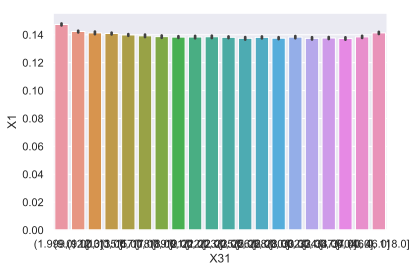

In [619]:
rawdata['X31']=pd.qcut(rawdata['X31'],20)
sns.barplot(x='X31',y='X1',data=rawdata)
plt.show()
#no information

In [620]:
rawdata.drop(['X31'],axis=1, inplace=True)
holdout.drop(['X31'],inplace=True,axis=1)

### X32: The initial listing status of the loan. Possible values are ‰ÛÒ W, F

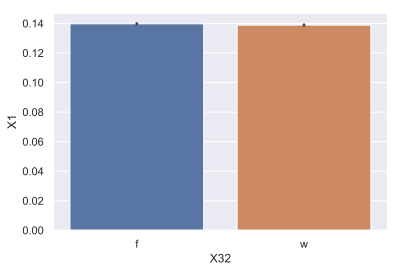

In [621]:
sns.barplot(x='X32',y='X1',data=rawdata)
plt.show()

In [622]:
rawdata.drop(['X32'],axis=1, inplace=True)
holdout.drop(['X32'],inplace=True,axis=1)

### Correlations Matrix

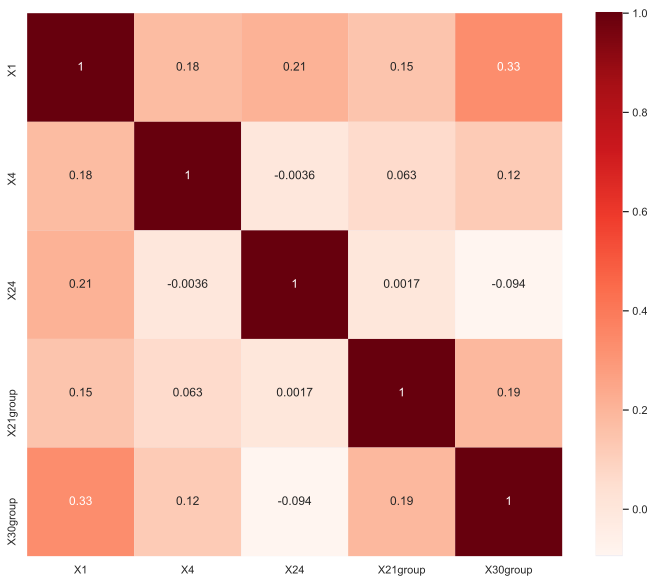

In [623]:
plt.figure(figsize=(12,10))
cor = rawdata.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [624]:
#same information is present in X9 and in a more granular form. 
rawdata.drop(['X8'],axis=1, inplace=True)
holdout.drop(['X8'],inplace=True,axis=1)

In [625]:
# a rough analysis of what kind of a variables we have finalied and their distinction on target variable
for col in rawdata.columns:
    if (len(rawdata[col].unique()) < 15):
        avg = rawdata.groupby(rawdata[col])['X1'].mean()*100
        value = rawdata[col].value_counts()
        df = pd.DataFrame({'Value': value, 'Avg':avg})
        print(df)

             Value       Avg
X7                          
 36 months  209979  12.73303
 60 months   77144  17.24372
                           Value        Avg
VERIFIED - income         107493  15.006911
VERIFIED - income source   88087  14.133559
not verified               91543  12.516497
      Value        Avg
X24                   
0.0  145807  13.078404
1.0   80794  14.429398
2.0   37167  15.120940
3.0   16779  15.682639
4.0    6576  16.126499
     Value        Avg
0.0  28903  12.899107
1.0  28475  13.248975
2.0  23565  13.377632
3.0  39859  13.631626
4.0  26834  13.860401
5.0  26330  14.002795
6.0  24844  14.184818
7.0  55785  14.445641
8.0  32528  15.259553
     Value        Avg
0.0  28702  11.109212
1.0  29259  12.210535
2.0  26278  12.958580
3.0  30693  13.452160
4.0  25283  13.879471
5.0  30060  14.254439
6.0  29604  14.626300
7.0  27543  14.985210
8.0  59701  15.899956


In [626]:
rawdata.shape #287k, 9

(287123, 9)

In [627]:
rawdata.isna().sum()

X1          0
X4          0
X7          0
X9          0
X14         0
X20         0
X24         0
X21group    0
X30group    0
dtype: int64

In [628]:
holdout.shape #80k, 9

backupdata= rawdata.copy()
backupholdout=holdout.copy()

In [630]:
holdout.head() # keeping X2 here to be used to identify predictions in csv

,X1,X2,X4,X7,X9,X14,X20,X24,X21group,X30group
0,NaN,44409194,6000,36 months,C5,VERIFIED - income,OH,1,8.0,6.0
1,NaN,44017917,24000,36 months,A1,VERIFIED - income,CA,1,4.0,1.0
2,NaN,44259158,35000,36 months,C2,VERIFIED - income,PA,0,8.0,3.0
3,NaN,44429213,10000,60 months,D1,VERIFIED - income source,CA,1,8.0,3.0
4,NaN,44299188,24000,60 months,B1,VERIFIED - income,PA,0,8.0,2.0


In [631]:
rawdata.head()

,X1,X4,X7,X9,X14,X20,X24,X21group,X30group
0,0.0788,4000,36 months,A5,not verified,TX,0.0,4.0,3.0
1,0.0859,10000,36 months,A4,not verified,MI,0.0,4.0,0.0
2,0.0714,3000,36 months,A3,not verified,GA,0.0,0.0,0.0
3,0.0863,6625,36 months,A5,not verified,CA,0.0,1.0,3.0
4,0.0894,15000,36 months,A5,not verified,NY,1.0,1.0,4.0


In [632]:
#rawdata =pd.get_dummies(rawdata, columns=['X7','X8','X9','X14','X20'])
#holdout =pd.get_dummies(holdout, columns=['X7','X8','X9','X14','X20'])
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# fit label encorder and return encoded integer labels for categorical string features
rawdata['X7'] = le.fit_transform(rawdata['X7'].values)
rawdata['X9'] = le.fit_transform(rawdata['X9'].values)
rawdata['X14'] = le.fit_transform(rawdata['X14'].values)
rawdata['X20'] = le.fit_transform(rawdata['X20'].values)
holdout['X7'] = le.fit_transform(holdout['X7'].values)
holdout['X9'] = le.fit_transform(holdout['X9'].values)
holdout['X14'] = le.fit_transform(holdout['X14'].values)
holdout['X20'] = le.fit_transform(holdout['X20'].values)


## Modelling

In [633]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as cv
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
from xgboost import plot_importance
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score

SEED=1
x=rawdata.iloc[:,1:15]
y=rawdata.iloc[:,0]
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25,random_state=SEED)

In [634]:
x.head()

,X4,X7,X9,X14,X20,X24,X21group,X30group
0,4000,0,4,2,42,0.0,4.0,3.0
1,10000,0,3,2,22,0.0,4.0,0.0
2,3000,0,2,2,10,0.0,0.0,0.0
3,6625,0,4,2,4,0.0,1.0,3.0
4,15000,0,4,2,33,1.0,1.0,4.0


In [635]:
def regression(clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    #ACCURACY
    
    print("RMSE = {:5.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))) 
    mse_dt = MSE(y_test, y_pred)
    rmse_dt = mse_dt**(1/2)
    print("Test set RMSE: {:.5f}".format(rmse_dt))
    
    MSE_CV_scores = - cross_val_score(clf, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print('CV RMSE: {:.5f}'.format(RMSE_CV))
    
    y_pred_train = clf.predict(x_train)
    RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
    print('Train RMSE: {:.5f}'.format(RMSE_train))
    print('Boosting Accuracy: {:.3f}'.format(explained_variance_score(y_test,y_pred))) 


In [637]:
# Instantiate individual models
ridge = RidgeCV(cv=10)
svm = SVC(random_state=SEED)
dt = DecisionTreeRegressor(random_state=SEED)

## Decision Tree

In [508]:
regression(dt)
#0.01 cv
#0.0008 train
#0.01 test
#possible overfitting. Let's try another model and see if it persists.

RMSE = 0.0114
Test set RMSE: 0.01139
CV RMSE: 0.01134
Train RMSE: 0.00079
Boosting Accuracy: 0.932


## RidgeCV

In [639]:
regression(ridge)
#0.009 cv/train/test
#Ridge CV has built in Cross validation and so it is the same

RMSE = 0.0090
Test set RMSE: 0.00905
CV RMSE: 0.00900
Train RMSE: 0.00900
Boosting Accuracy: 0.957


## XGBoost

In [640]:
# code taken from the internet and fit to Loan data 
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
param_dict = {
    'max_depth':6, 
    'min_child_weight': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse'
}
num_boost_round=999
model = xgb.train(
    param_dict,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],early_stopping_rounds=10
)

[12:33:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:0.254387
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:0.178175
[2]	Test-rmse:0.124867
[3]	Test-rmse:0.087608
[4]	Test-rmse:0.061608
[5]	Test-rmse:0.04352
[6]	Test-rmse:0.031017
[7]	Test-rmse:0.022475
[8]	Test-rmse:0.016755
[9]	Test-rmse:0.013067
[10]	Test-rmse:0.010798
[11]	Test-rmse:0.009479
[12]	Test-rmse:0.008757
[13]	Test-rmse:0.008377
[14]	Test-rmse:0.008183
[15]	Test-rmse:0.008078
[16]	Test-rmse:0.008001
[17]	Test-rmse:0.007976
[18]	Test-rmse:0.007941
[19]	Test-rmse:0.00793
[20]	Test-rmse:0.007926
[21]	Test-rmse:0.007921
[22]	Test-rmse:0.007912
[23]	Test-rmse:0.007905
[24]	Test-rmse:0.007901
[25]	Test-rmse:0.007896
[26]	Test-rmse:0.007888
[27]	Test-rmse:0.007888
[28]	Test-rmse:0.007886
[29]	Test-rmse:0.007883
[30]	Test-rmse:0.007877
[31]	Test-rmse:0.007877
[32]	Test-rmse:0.007873

In [641]:
dpred=xgb.DMatrix(x)
acc_xgb=model.best_score
print("RMSE of XGB model on training data: ",
      np.sqrt(MSE(model.predict(dpred), y)))
print("Model's best RMSE on test set: ", model.best_score)
print('Boosting Accuracy: {:.3f}'.format(explained_variance_score(y_test,GBDT_test_pred )))    
print("Model's best iteration: ", model.best_iteration+1)
#0.007 test/train

RMSE of XGB model on training data:  0.007548893439742037
Model's best RMSE on test set:  0.007827
Boosting Accuracy: 0.970
Model's best iteration:  105


*Because XGBoost does several iterations of the model to find the best version, it also cross validates itself in the process. xgb.cv is used for parameter tuning, and is computationally expensive so I will not try that here.

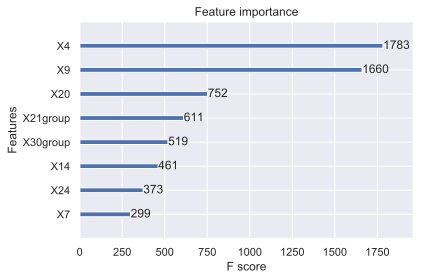

In [642]:
plt.show(plot_importance(model))
#none of the features look redundant and there is no indication of overfitting, both train and test sets are performing similarly.

Clearly, XGBoost has performed the best.

## Applying XGBoost to holdout data

In [ ]:
# write out csv for each model's test predictions
linear_test_pred = pd.DataFrame(ridge_test_pred, columns=['RidgePredictions'])

XGB_test_pred = pd.DataFrame(GBDT_test_pred, columns=['XGBPredictions'])

test_predictions = pd.concat([linear_test_pred, XGB_test_pred], axis=1)

#test_predictions.to_csv(".csv")

In [647]:
holdout_x=holdout.iloc[:,2:30]
holdout_pred=model.predict(xgb.DMatrix(holdout_x))
submission = pd.DataFrame({'X2':holdout['X2'],'X1':holdout_pred*100.0})
submission.head()
submission.to_csv("Loan_results_from_12226953.csv")

### Writeup

For this exercise, I used 3 Regression models: Decision Trees, Ridge CV and XGBoost. The data was grouped into categories where required, and fit transformed using label encoder.The first technique used was Ridge CV, which has inbuilt cross validation based on ridge regression. Its results were also comparable to decision trees. Out of the three XGBoost was the most powerful technique which has gradiant boosted decision trees - it is used widely to improve accuracy of structured data. It tests the data on several iterations, accounts for multicollinearity, performs cross validation and suggests the most accurate model. 